In [58]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# The path to our CSV file
school_saftey = "Resources/2019_SSEC_NYC.xlsx"

In [60]:
# Read our Kickstarter data into pandas
school_saftey_df = pd.read_excel(school_saftey, encoding = "ISO-8859-1", skiprows=2)
school_saftey_df.head()

,County,District,School Name,BEDS Code,Grade Organization,Need/Resource Category,School Type,Enrollment,Inactive Date,Homicide,...,Assault - Physical Injury: Total Number of Incidents,Assault - Serious Physical Injury,Weapons Possession: Routine Security Check,Weapons Possession: Other,"Discrimination, Harassment, and Bullying: All Excluding Cyberbullying","Discrimination, Harassment, and Bullying: Cyberbullying",Bomb Threat,False Alarm,"Use, Possession, or Sale of Drugs","Use, Possession, or Sale of Alcohol"
0,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 15 ROBERTO CLEMENTE,310100010015,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),171,NaT,0,...,0,0,0,0,0,0,0,0,0,0
1,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 19 ASHER LEVY,310100010019,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),248,NaT,0,...,0,0,0,0,3,0,0,0,0,0
2,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 20 ANNA SILVER,310100010020,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),482,NaT,0,...,2,0,0,0,1,0,0,0,0,0
3,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 34 FRANKLIN D ROOSEVELT,310100010034,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),305,NaT,0,...,2,0,0,1,5,2,0,0,1,0
4,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,STAR ACADEMY PS 63 (THE),310100010063,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),231,NaT,0,...,2,0,0,0,9,0,0,0,0,0


In [89]:
# Delete the rows not pertinent to our analysis:
reduced_school_saftey_df = school_saftey_df.drop(columns=['School Name', 'BEDS Code', 'Grade Organization', 'Need/Resource Category', 'Enrollment', 'Inactive Date'])
reduced_school_saftey_df = school_saftey_df.rename(columns = {'County': 'Borough'})
reduced_school_saftey_df

,Borough,District,School Name,BEDS Code,Grade Organization,Need/Resource Category,School Type,Enrollment,Inactive Date,Homicide,...,Assault - Physical Injury: Total Number of Incidents,Assault - Serious Physical Injury,Weapons Possession: Routine Security Check,Weapons Possession: Other,"Discrimination, Harassment, and Bullying: All Excluding Cyberbullying","Discrimination, Harassment, and Bullying: Cyberbullying",Bomb Threat,False Alarm,"Use, Possession, or Sale of Drugs","Use, Possession, or Sale of Alcohol"
0,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 15 ROBERTO CLEMENTE,310100010015,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),171,NaT,0,...,0,0,0,0,0,0,0,0,0,0
1,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 19 ASHER LEVY,310100010019,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),248,NaT,0,...,0,0,0,0,3,0,0,0,0,0
2,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 20 ANNA SILVER,310100010020,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),482,NaT,0,...,2,0,0,0,1,0,0,0,0,0
3,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 34 FRANKLIN D ROOSEVELT,310100010034,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),305,NaT,0,...,2,0,0,1,5,2,0,0,1,0
4,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,STAR ACADEMY PS 63 (THE),310100010063,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),231,NaT,0,...,2,0,0,0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,RICHMOND,NYC GEOG DIST #31 - SI,STATEN ISLAND TECH HIGH SCHOOL,353100011605,Senior High,NEW YORK CITY,PUBLIC SCHOOL (IMF),1332,NaT,0,...,3,1,0,0,12,6,0,0,1,0
1750,RICHMOND,JOHN W LAVELLE PREP CHARTER,JOHN W LAVELLE PREP CHARTER SCHOOL,353100860959,Junior-Senior High,CHARTER SCHOOL,CHARTER SCHOOLS (IMF),755,NaT,0,...,1,0,0,1,1,0,0,0,4,1
1751,RICHMOND,NEW WORLD PREP CHARTER SCHOO,NEW WORLD PREP CHARTER SCHOOL,353100860984,Middle,CHARTER SCHOOL,CHARTER SCHOOLS (IMF),412,NaT,0,...,1,0,0,0,1,0,0,0,2,1
1752,RICHMOND,NEW VENTURES CHARTER SCHOOL,NEW VENTURES CHARTER SCHOOL,353100861083,Senior High,CHARTER SCHOOL,CHARTER SCHOOLS (IMF),117,NaT,0,...,0,0,0,0,0,0,0,0,5,0


In [90]:
## Sum up all of the school crimes by row and create a new column with the crime total
# Make list of the columns we want to sum:
crimes_list = ['Homicide', 'Sexual Offenses: Forcible Sex Offenses',
       'Sexual Offenses: Other Sex Offenses',
       'Assault - Physical Injury: Total Number of Incidents',
       'Assault - Serious Physical Injury',
       'Weapons Possession: Routine Security Check',
       'Weapons Possession: Other ',
       'Discrimination, Harassment, and Bullying: All Excluding Cyberbullying',
       'Discrimination, Harassment, and Bullying: Cyberbullying',
       'Bomb Threat', 'False Alarm', 'Use, Possession, or Sale of Drugs',
       'Use, Possession, or Sale of Alcohol']
# Sum the crimes for each row and place in a new column titled "Total Crimes"
reduced_school_saftey_df['Total Crimes'] = reduced_school_saftey_df[crimes_list].sum(axis=1)
reduced_school_saftey_df

,Borough,District,School Name,BEDS Code,Grade Organization,Need/Resource Category,School Type,Enrollment,Inactive Date,Homicide,...,Assault - Serious Physical Injury,Weapons Possession: Routine Security Check,Weapons Possession: Other,"Discrimination, Harassment, and Bullying: All Excluding Cyberbullying","Discrimination, Harassment, and Bullying: Cyberbullying",Bomb Threat,False Alarm,"Use, Possession, or Sale of Drugs","Use, Possession, or Sale of Alcohol",Total Crimes
0,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 15 ROBERTO CLEMENTE,310100010015,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),171,NaT,0,...,0,0,0,0,0,0,0,0,0,0
1,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 19 ASHER LEVY,310100010019,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),248,NaT,0,...,0,0,0,3,0,0,0,0,0,4
2,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 20 ANNA SILVER,310100010020,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),482,NaT,0,...,0,0,0,1,0,0,0,0,0,3
3,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,PS 34 FRANKLIN D ROOSEVELT,310100010034,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),305,NaT,0,...,0,0,1,5,2,0,0,1,0,12
4,NEW YORK,NYC GEOG DIST # 1 - MANHATTAN,STAR ACADEMY PS 63 (THE),310100010063,Elementary,NEW YORK CITY,PUBLIC SCHOOL (IMF),231,NaT,0,...,0,0,0,9,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,RICHMOND,NYC GEOG DIST #31 - SI,STATEN ISLAND TECH HIGH SCHOOL,353100011605,Senior High,NEW YORK CITY,PUBLIC SCHOOL (IMF),1332,NaT,0,...,1,0,0,12,6,0,0,1,0,24
1750,RICHMOND,JOHN W LAVELLE PREP CHARTER,JOHN W LAVELLE PREP CHARTER SCHOOL,353100860959,Junior-Senior High,CHARTER SCHOOL,CHARTER SCHOOLS (IMF),755,NaT,0,...,0,0,1,1,0,0,0,4,1,12
1751,RICHMOND,NEW WORLD PREP CHARTER SCHOO,NEW WORLD PREP CHARTER SCHOOL,353100860984,Middle,CHARTER SCHOOL,CHARTER SCHOOLS (IMF),412,NaT,0,...,0,0,0,1,0,0,0,2,1,8
1752,RICHMOND,NEW VENTURES CHARTER SCHOOL,NEW VENTURES CHARTER SCHOOL,353100861083,Senior High,CHARTER SCHOOL,CHARTER SCHOOLS (IMF),117,NaT,0,...,0,0,0,0,0,0,0,5,0,5


In [91]:
# Export to xlsx file:
reduced_school_saftey_df.to_excel("Cleaned_School_Saftey.xlsx")

In [96]:
# Group the columns by county
grouped_school_saftey_df = reduced_school_saftey_df.groupby(['Borough'])

# Show the number of schools in each county:
num_schools_by_county = grouped_school_saftey_df.count()
num_schools_by_county.head(5)

,District,School Name,BEDS Code,Grade Organization,Need/Resource Category,School Type,Enrollment,Inactive Date,Homicide,Sexual Offenses: Forcible Sex Offenses,...,Assault - Serious Physical Injury,Weapons Possession: Routine Security Check,Weapons Possession: Other,"Discrimination, Harassment, and Bullying: All Excluding Cyberbullying","Discrimination, Harassment, and Bullying: Cyberbullying",Bomb Threat,False Alarm,"Use, Possession, or Sale of Drugs","Use, Possession, or Sale of Alcohol",Total Crimes
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,427,427,427,427,427,427,427,1,427,427,...,427,427,427,427,427,427,427,427,427,427
KINGS,543,543,543,543,543,543,543,0,543,543,...,543,543,543,543,543,543,543,543,543,543
NEW YORK,344,344,344,344,344,344,344,0,344,344,...,344,344,344,344,344,344,344,344,344,344
QUEENS,364,364,364,364,364,364,364,0,364,364,...,364,364,364,364,364,364,364,364,364,364
RICHMOND,76,76,76,76,76,76,76,0,76,76,...,76,76,76,76,76,76,76,76,76,76


In [97]:
# Sum the total crimes for each county
county_total_crimes = grouped_school_saftey_df["Total Crimes"].sum()

# Create a new dataframe showing the total crimes by county:
county_crimes_summary_df = pd.DataFrame({"Total Crimes": county_total_crimes})
county_crimes_summary_df.head(5)

,Total Crimes
Borough,
BRONX,5368
KINGS,6181
NEW YORK,3425
QUEENS,4954
RICHMOND,1509


In [100]:
# Find the avgerage number of crimes by county (total crimes/number of schools in the county):
county_avg_crimes_summary_df = reduced_school_saftey_df.groupby('Borough')['Total Crimes'].agg(['mean'])
new_county_summary = county_avg_crimes_summary_df.rename(columns = {'mean': 'Avg # of School Crimes'})
new_county_summary

,Avg # of School Crimes
Borough,
BRONX,12.571429
KINGS,11.383057
NEW YORK,9.956395
QUEENS,13.609890
RICHMOND,19.855263


In [101]:
# Bring in the Bouroughs dataframe:
boroughs = "Resources/Boroughs.csv"
boroughs_df = pd.read_csv(boroughs)
boroughs_df.head()

,City,Borough,Neighborhood,ZIP Code
0,New York,Bronx,Central Bronx,"10453, 10457, 10460"
1,New York,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
2,New York,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
3,New York,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,New York,Bronx,Kingsbridge and Riverdale,"10463, 10471"


In [102]:
# Show all the bouroughs in the bouroughs dataframe:
boroughs_df.Borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [103]:
# Change county names to boroughs
new_county_summary.rename({'BRONX': 'Bronx',
                            'KINGS': 'Brooklyn',
                            'NEW YORK': 'Manhattan',
                            'QUEENS': 'Queens',
                            'RICHMOND': 'Staten Island'}, inplace=True)
borough_df = new_county_summary.rename(columns = {'County': 'Borough'})
borough_df

,Avg # of School Crimes
Borough,
Bronx,12.571429
Brooklyn,11.383057
Manhattan,9.956395
Queens,13.609890
Staten Island,19.855263


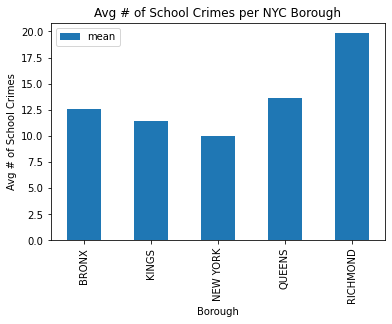

In [95]:
# Create a bar chart based off of the group series from before
borough_chart = county_avg_crimes_summary_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
borough_chart.set_xlabel("Borough")
borough_chart.set_ylabel("Avg # of School Crimes")
plt.title("Avg # of School Crimes per NYC Borough")
plt.savefig("Avg_School_Crimes.png")
plt.show()